# Used Data Set: https://www.kaggle.com/datasets/nikdavis/steam-store-raw?select=steamspy_data.csv

# Questions:

1. who are the top 10 developers published a game and number of games they published?
2. How many free and non-free games?
3. Which game has the most owners?
4. How many games of each type and what is the most popular type of games?
5. What are the top 10 supported languages?
6. What is the most played game?
7. What is the average price for paid games?
8. Top 10 most popular games?
9. Which publisher has the best average rating?
10. What is the relationship between discount and the number of owners?
11. How many games have 'Multiplayer' and free?
12. Do larger companies get higher ratings?
13. How many games received more negative reviews than positive ones?
14. is there a relation between user average & price ?
15. How many games have a positive rating of more than 90%?
16. correlation matrix


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv("steamspy_data.csv")

In [4]:
df 

,appid,name,developer,publisher,score_rank,positive,negative,userscore,owners,average_forever,average_2weeks,median_forever,median_2weeks,price,initialprice,discount,languages,genre,ccu,tags
0,10,Counter-Strike,Valve,Valve,NaN,124534,3339,0,"10,000,000 .. 20,000,000",17612,709,317,26,999.0,999.0,0.0,"English, French, German, Italian, Spanish - Sp...",Action,14923,"{'Action': 2681, 'FPS': 2048, 'Multiplayer': 1..."
1,20,Team Fortress Classic,Valve,Valve,NaN,3318,633,0,"5,000,000 .. 10,000,000",277,15,62,15,499.0,499.0,0.0,"English, French, German, Italian, Spanish - Sp...",Action,87,"{'Action': 208, 'FPS': 188, 'Multiplayer': 172..."
2,30,Day of Defeat,Valve,Valve,NaN,3416,398,0,"5,000,000 .. 10,000,000",187,0,34,0,499.0,499.0,0.0,"English, French, German, Italian, Spanish - Spain",Action,130,"{'FPS': 138, 'World War II': 122, 'Multiplayer..."
3,40,Deathmatch Classic,Valve,Valve,NaN,1273,267,0,"5,000,000 .. 10,000,000",258,0,184,0,499.0,499.0,0.0,"English, French, German, Italian, Spanish - Sp...",Action,4,"{'Action': 85, 'FPS': 71, 'Multiplayer': 58, '..."
4,50,Half-Life: Opposing Force,Gearbox Software,Valve,NaN,5250,288,0,"5,000,000 .. 10,000,000",624,0,415,0,499.0,499.0,0.0,"English, French, German, Korean",Action,71,"{'FPS': 235, 'Action': 211, 'Sci-fi': 166, 'Si..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29230,1065230,Room of Pandora,SHEN JIAWEI,SHEN JIAWEI,NaN,3,0,0,"0 .. 20,000",0,0,0,0,254.0,299.0,15.0,"English, Japanese, Simplified Chinese, Traditi...","Adventure, Casual, Indie",0,"{'Adventure': 21, 'Indie': 21, 'Casual': 21, '..."
29231,1065570,Cyber Gun,Semyon Maximov,BekkerDev Studio,NaN,8,1,0,"0 .. 20,000",0,0,0,0,119.0,199.0,40.0,English,"Action, Adventure, Indie",1,"{'Action': 21, 'Indie': 21, 'Adventure': 20, '..."
29232,1065650,Super Star Blast,EntwicklerX,EntwicklerX,NaN,0,1,0,"0 .. 20,000",0,0,0,0,424.0,499.0,15.0,English,"Action, Casual, Indie",0,"{'Action': 21, 'Indie': 21, 'Casual': 21}"
29233,1066700,New Yankee 7: Deer Hunters,Yustas Game Studio,Alawar Entertainment,NaN,2,0,0,"0 .. 20,000",0,0,0,0,699.0,699.0,0.0,"English, German, Korean, Russian","Adventure, Casual, Indie",1,"{'Indie': 21, 'Casual': 21, 'Adventure': 20}"


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29235 entries, 0 to 29234
Data columns (total 20 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   appid            29235 non-null  int64  
 1   name             29230 non-null  object 
 2   developer        29037 non-null  object 
 3   publisher        28939 non-null  object 
 4   score_rank       58 non-null     float64
 5   positive         29235 non-null  int64  
 6   negative         29235 non-null  int64  
 7   userscore        29235 non-null  int64  
 8   owners           29235 non-null  object 
 9   average_forever  29235 non-null  int64  
 10  average_2weeks   29235 non-null  int64  
 11  median_forever   29235 non-null  int64  
 12  median_2weeks    29235 non-null  int64  
 13  price            29206 non-null  float64
 14  initialprice     29213 non-null  float64
 15  discount         29213 non-null  float64
 16  languages        29141 non-null  object 
 17  genre       

In [6]:
df.isnull().sum()

appid                  0
name                   5
developer            198
publisher            296
score_rank         29177
positive               0
negative               0
userscore              0
owners                 0
average_forever        0
average_2weeks         0
median_forever         0
median_2weeks          0
price                 29
initialprice          22
discount              22
languages             94
genre                152
ccu                    0
tags                   0
dtype: int64

# Cleaning Data: 

Remove (Score_rank) Column:

In [7]:
df.drop(columns=['score_rank'], inplace = True)

In [8]:
df.isnull().sum()

appid                0
name                 5
developer          198
publisher          296
positive             0
negative             0
userscore            0
owners               0
average_forever      0
average_2weeks       0
median_forever       0
median_2weeks        0
price               29
initialprice        22
discount            22
languages           94
genre              152
ccu                  0
tags                 0
dtype: int64

Dealing With Missing Values In (name) Column:

In [9]:
missing = df[df['name'].isna()]
missing

,appid,name,developer,publisher,positive,negative,userscore,owners,average_forever,average_2weeks,median_forever,median_2weeks,price,initialprice,discount,languages,genre,ccu,tags
481,17760,NaN,NaN,NaN,0,0,0,"0 .. 20,000",0,0,0,0,0.0,0.0,0.0,NaN,NaN,0,[]
7235,396420,NaN,NaN,NaN,22,9,0,"20,000 .. 50,000",0,0,0,0,0.0,0.0,0.0,NaN,NaN,0,"{'Free to Play': 24, 'Action': 21, 'Indie': 21..."
9553,460250,NaN,Jeroen Wimmers,Jeroen Wimmers,44,4,0,"0 .. 20,000",0,0,0,0,899.0,899.0,0.0,"English, French, Italian, German, Spanish - Sp...","Casual, Indie",0,"{'Indie': 34, 'Casual': 24, 'Puzzle': 15, 'Min..."
22244,806160,NaN,Paleno Games,Paleno Games,4,13,0,"0 .. 20,000",0,0,0,0,99.0,99.0,0.0,"English, French, Italian, German, Spanish - Sp...","Action, Adventure, Casual, Indie",0,"{'Action': 22, 'Indie': 22, 'Casual': 21, 'Adv..."
27324,965340,NaN,2nd Studio,2nd Studio,31,1,0,"0 .. 20,000",0,0,0,0,199.0,199.0,0.0,"English, German, Danish, Japanese, Russian, Si...","Action, Indie, Simulation",0,"{'Indie': 32, 'Sexual Content': 31, 'Action': ..."


In [10]:
df.dropna(subset=['name'], inplace = True)

In [11]:
df.isnull().sum()

appid                0
name                 0
developer          196
publisher          294
positive             0
negative             0
userscore            0
owners               0
average_forever      0
average_2weeks       0
median_forever       0
median_2weeks        0
price               29
initialprice        22
discount            22
languages           92
genre              150
ccu                  0
tags                 0
dtype: int64

Deling With Missing Values In (developer) Column: 

In [12]:
missing_dev = df[df['developer'].isna()]
missing_dev

,appid,name,developer,publisher,positive,negative,userscore,owners,average_forever,average_2weeks,median_forever,median_2weeks,price,initialprice,discount,languages,genre,ccu,tags
26,852,ValveTestApp852,NaN,NaN,0,0,0,"0 .. 20,000",0,0,0,0,0.0,0.0,0.0,NaN,NaN,0,[]
147,4330,Star Trek: DAC - Demo,NaN,NaN,0,0,0,"0 .. 20,000",0,0,0,0,0.0,0.0,0.0,NaN,NaN,0,[]
256,8740,Puzzlegeddon,NaN,NaN,0,0,0,"0 .. 20,000",0,0,0,0,0.0,0.0,0.0,NaN,NaN,1,[]
264,8955,Borderlands DLC: Claptrap's New Robot Revolution,NaN,NaN,0,0,0,"0 .. 20,000",0,0,0,0,0.0,0.0,0.0,NaN,NaN,0,[]
285,9730,Tycoon City: New York,NaN,Retroism,58,102,0,"20,000 .. 50,000",0,0,0,0,999.0,999.0,0.0,English,NaN,0,"{'Simulation': 34, 'Management': 18, 'City Bui..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25766,910290,CRACKPOT DESPOT: TRUMP WARFARE,NaN,NaN,0,1,0,"0 .. 20,000",0,0,0,0,499.0,499.0,0.0,English,"Action, Adventure, Casual, Indie",0,"{'Action': 21, 'Indie': 21, 'Adventure': 20, '..."
25772,910430,The War of the Worlds: Andromeda,NaN,Mediamas Europa,4,6,0,"0 .. 20,000",0,0,0,0,499.0,499.0,0.0,"English, Spanish - Spain",NaN,0,"{'Action': 21, 'Indie': 21}"
26731,943490,Team Fortress 2008,NaN,NaN,0,0,0,"0 .. 20,000",0,0,0,0,NaN,NaN,NaN,NaN,NaN,0,[]
26748,944060,魔法洞穴２ The Enchanted Cave 2,NaN,NaN,0,0,0,"0 .. 20,000",0,0,0,0,NaN,NaN,NaN,NaN,NaN,0,[]


In [13]:
missing_pub = df[df['publisher'].isna()]
missing_pub

,appid,name,developer,publisher,positive,negative,userscore,owners,average_forever,average_2weeks,median_forever,median_2weeks,price,initialprice,discount,languages,genre,ccu,tags
26,852,ValveTestApp852,NaN,NaN,0,0,0,"0 .. 20,000",0,0,0,0,0.0,0.0,0.0,NaN,NaN,0,[]
67,2540,RIP - Trilogy,Elephant Games,NaN,199,131,0,"100,000 .. 200,000",1,0,2,0,499.0,499.0,0.0,English,"Casual, Indie",0,"{'Indie': 38, 'Casual': 35, 'Arcade': 14, 'Sho..."
68,2570,Vigil: Blood Bitterness,Freegamer,NaN,29,108,0,"50,000 .. 100,000",1,0,2,0,0.0,0.0,0.0,English,"Indie, RPG",0,"{'Indie': 27, 'RPG': 22, 'Puzzle': 7, 'Singlep..."
147,4330,Star Trek: DAC - Demo,NaN,NaN,0,0,0,"0 .. 20,000",0,0,0,0,0.0,0.0,0.0,NaN,NaN,0,[]
190,6600,Bullet Candy,R C Knight,NaN,39,32,0,"50,000 .. 100,000",0,0,0,0,399.0,399.0,0.0,English,"Casual, Indie",0,"{'Indie': 27, 'Casual': 23, 'Twin Stick Shoote..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26748,944060,魔法洞穴２ The Enchanted Cave 2,NaN,NaN,0,0,0,"0 .. 20,000",0,0,0,0,NaN,NaN,NaN,NaN,NaN,0,[]
26865,948340,Journey Through Memories,"Niken Hertanto, Inkan Hertanto, Juan Rosales, ...",NaN,4,0,0,"0 .. 20,000",0,0,0,0,99.0,99.0,0.0,English,Indie,0,{'Indie': 22}
27456,970800,Short Circuit VR,"Stefan Bauwens, Cindy Ho",NaN,25,3,0,"0 .. 20,000",0,0,0,0,0.0,0.0,0.0,English,"Indie, Simulation, Early Access",1,"{'Early Access': 21, 'Indie': 21, 'Simulation'..."
27895,987790,Call of Pixel: Close Quarters,Moka,NaN,5,7,0,"0 .. 20,000",0,0,0,0,0.0,0.0,0.0,English,"Action, Casual, Free to Play, Indie, Massively...",0,"{'Early Access': 21, 'Indie': 31, 'Free to Pla..."


Deling With Missing Values In (publisher) Column: 

In [14]:
df['publisher'] = df['publisher'].fillna(df['developer'])

In [15]:
df.isnull().sum()

appid                0
name                 0
developer          196
publisher          142
positive             0
negative             0
userscore            0
owners               0
average_forever      0
average_2weeks       0
median_forever       0
median_2weeks        0
price               29
initialprice        22
discount            22
languages           92
genre              150
ccu                  0
tags                 0
dtype: int64

Deling wWith Missing Values In (developer) Column: 

In [16]:
df['developer'] = df['developer'].fillna(df['publisher'])

In [17]:
df.isnull().sum()

appid                0
name                 0
developer          142
publisher          142
positive             0
negative             0
userscore            0
owners               0
average_forever      0
average_2weeks       0
median_forever       0
median_2weeks        0
price               29
initialprice        22
discount            22
languages           92
genre              150
ccu                  0
tags                 0
dtype: int64

In [18]:
missing_dev = df[df['publisher'].isna()]
missing_dev

,appid,name,developer,publisher,positive,negative,userscore,owners,average_forever,average_2weeks,median_forever,median_2weeks,price,initialprice,discount,languages,genre,ccu,tags
26,852,ValveTestApp852,NaN,NaN,0,0,0,"0 .. 20,000",0,0,0,0,0.0,0.0,0.0,NaN,NaN,0,[]
147,4330,Star Trek: DAC - Demo,NaN,NaN,0,0,0,"0 .. 20,000",0,0,0,0,0.0,0.0,0.0,NaN,NaN,0,[]
256,8740,Puzzlegeddon,NaN,NaN,0,0,0,"0 .. 20,000",0,0,0,0,0.0,0.0,0.0,NaN,NaN,1,[]
264,8955,Borderlands DLC: Claptrap's New Robot Revolution,NaN,NaN,0,0,0,"0 .. 20,000",0,0,0,0,0.0,0.0,0.0,NaN,NaN,0,[]
387,13120,America's Army 3 Beta,NaN,NaN,0,0,0,"0 .. 20,000",0,0,0,0,0.0,0.0,0.0,NaN,NaN,0,[]
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23638,846260,Murderous Pursuits Beta,NaN,NaN,0,0,0,"0 .. 20,000",0,0,0,0,NaN,NaN,NaN,NaN,NaN,0,[]
24921,881910,The Battle Of Ages,NaN,NaN,2,1,0,"0 .. 20,000",0,0,0,0,499.0,499.0,0.0,English,"Action, Indie, Massively Multiplayer, RPG, Ear...",0,"{'Early Access': 21, 'Action': 22, 'Massively ..."
25766,910290,CRACKPOT DESPOT: TRUMP WARFARE,NaN,NaN,0,1,0,"0 .. 20,000",0,0,0,0,499.0,499.0,0.0,English,"Action, Adventure, Casual, Indie",0,"{'Action': 21, 'Indie': 21, 'Adventure': 20, '..."
26731,943490,Team Fortress 2008,NaN,NaN,0,0,0,"0 .. 20,000",0,0,0,0,NaN,NaN,NaN,NaN,NaN,0,[]


Deling With Missing Values In (price) Column: 

In [19]:
df[df['price'].isna()]

,appid,name,developer,publisher,positive,negative,userscore,owners,average_forever,average_2weeks,median_forever,median_2weeks,price,initialprice,discount,languages,genre,ccu,tags
639,29017,Blood Bowl 2 - Review,NaN,NaN,0,0,0,"0 .. 20,000",0,0,0,0,NaN,0.0,0.0,NaN,NaN,0,[]
2056,239490,America's Army: Proving Grounds Beta (Closed),NaN,NaN,0,0,0,"0 .. 20,000",0,0,0,0,NaN,0.0,0.0,NaN,NaN,0,[]
4261,321210,Blade Symphony Beta,NaN,NaN,0,0,0,"0 .. 20,000",0,0,0,0,NaN,NaN,NaN,NaN,NaN,0,[]
7076,391920,Ether One Redux,NaN,NaN,0,0,0,"0 .. 20,000",0,0,0,0,NaN,0.0,0.0,NaN,NaN,0,[]
7248,396740,Blood Bowl 2 - Preview,NaN,NaN,0,0,0,"0 .. 20,000",0,0,0,0,NaN,0.0,0.0,NaN,NaN,0,[]
7859,413010,Conflicks - Revolutionary Space Battles Demo,NaN,NaN,0,0,0,"0 .. 20,000",0,0,0,0,NaN,0.0,0.0,NaN,NaN,0,[]
8141,421730,Block N Load PTR,NaN,NaN,0,0,0,"0 .. 20,000",0,0,0,0,NaN,0.0,0.0,NaN,NaN,0,[]
8774,439400,Legends of Callasia Demo,NaN,NaN,0,0,0,"0 .. 20,000",0,0,0,0,NaN,NaN,NaN,NaN,NaN,0,[]
8967,445730,Watch paint dry,NaN,NaN,0,0,0,"0 .. 20,000",0,0,0,0,NaN,0.0,0.0,NaN,NaN,0,[]
10737,497960,Legends of Callasia Demo,NaN,NaN,0,0,0,"0 .. 20,000",0,0,0,0,NaN,NaN,NaN,NaN,NaN,0,[]


In [20]:
df['price'] = df['price'].fillna(df['initialprice'])

In [21]:
df.isnull().sum()

appid                0
name                 0
developer          142
publisher          142
positive             0
negative             0
userscore            0
owners               0
average_forever      0
average_2weeks       0
median_forever       0
median_2weeks        0
price               22
initialprice        22
discount            22
languages           92
genre              150
ccu                  0
tags                 0
dtype: int64

In [22]:
df[df['price'].isna()]

,appid,name,developer,publisher,positive,negative,userscore,owners,average_forever,average_2weeks,median_forever,median_2weeks,price,initialprice,discount,languages,genre,ccu,tags
4261,321210,Blade Symphony Beta,NaN,NaN,0,0,0,"0 .. 20,000",0,0,0,0,NaN,NaN,NaN,NaN,NaN,0,[]
8774,439400,Legends of Callasia Demo,NaN,NaN,0,0,0,"0 .. 20,000",0,0,0,0,NaN,NaN,NaN,NaN,NaN,0,[]
10737,497960,Legends of Callasia Demo,NaN,NaN,0,0,0,"0 .. 20,000",0,0,0,0,NaN,NaN,NaN,NaN,NaN,0,[]
10790,499450,The Witcher 3: Wild Hunt Game of the Year Edition,NaN,NaN,0,0,0,"0 .. 20,000",0,0,0,0,NaN,NaN,NaN,NaN,NaN,0,[]
12076,530940,BIOHAZARD 7 resident evil グロテスクVer.,NaN,NaN,0,0,0,"0 .. 20,000",0,0,0,0,NaN,NaN,NaN,NaN,NaN,0,[]
14216,587030,Bunker Busters Steamworks Test,NaN,NaN,0,0,0,"0 .. 20,000",0,0,0,0,NaN,NaN,NaN,NaN,NaN,0,[]
15719,630790,PSYCHO-PASS,NaN,NaN,0,0,0,"0 .. 20,000",0,0,0,0,NaN,NaN,NaN,NaN,NaN,0,[]
16164,648590,428 〜封鎖された渋谷で〜,NaN,NaN,0,0,0,"0 .. 20,000",0,0,0,0,NaN,NaN,NaN,NaN,NaN,0,[]
16539,657860,Dragon's Prophet Turkiye,NaN,NaN,0,0,0,"0 .. 20,000",190,0,190,0,NaN,NaN,NaN,NaN,NaN,0,[]
16673,661250,Jarheads,NaN,NaN,0,0,0,"0 .. 20,000",0,0,0,0,NaN,NaN,NaN,NaN,NaN,0,[]


In [23]:
df.dropna(subset=['price'], inplace= True)


In [24]:
df.isnull().sum()

appid                0
name                 0
developer          120
publisher          120
positive             0
negative             0
userscore            0
owners               0
average_forever      0
average_2weeks       0
median_forever       0
median_2weeks        0
price                0
initialprice         0
discount             0
languages           70
genre              128
ccu                  0
tags                 0
dtype: int64

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 29208 entries, 0 to 29234
Data columns (total 19 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   appid            29208 non-null  int64  
 1   name             29208 non-null  object 
 2   developer        29088 non-null  object 
 3   publisher        29088 non-null  object 
 4   positive         29208 non-null  int64  
 5   negative         29208 non-null  int64  
 6   userscore        29208 non-null  int64  
 7   owners           29208 non-null  object 
 8   average_forever  29208 non-null  int64  
 9   average_2weeks   29208 non-null  int64  
 10  median_forever   29208 non-null  int64  
 11  median_2weeks    29208 non-null  int64  
 12  price            29208 non-null  float64
 13  initialprice     29208 non-null  float64
 14  discount         29208 non-null  float64
 15  languages        29138 non-null  object 
 16  genre            29080 non-null  object 
 17  ccu              

In [26]:
df

,appid,name,developer,publisher,positive,negative,userscore,owners,average_forever,average_2weeks,median_forever,median_2weeks,price,initialprice,discount,languages,genre,ccu,tags
0,10,Counter-Strike,Valve,Valve,124534,3339,0,"10,000,000 .. 20,000,000",17612,709,317,26,999.0,999.0,0.0,"English, French, German, Italian, Spanish - Sp...",Action,14923,"{'Action': 2681, 'FPS': 2048, 'Multiplayer': 1..."
1,20,Team Fortress Classic,Valve,Valve,3318,633,0,"5,000,000 .. 10,000,000",277,15,62,15,499.0,499.0,0.0,"English, French, German, Italian, Spanish - Sp...",Action,87,"{'Action': 208, 'FPS': 188, 'Multiplayer': 172..."
2,30,Day of Defeat,Valve,Valve,3416,398,0,"5,000,000 .. 10,000,000",187,0,34,0,499.0,499.0,0.0,"English, French, German, Italian, Spanish - Spain",Action,130,"{'FPS': 138, 'World War II': 122, 'Multiplayer..."
3,40,Deathmatch Classic,Valve,Valve,1273,267,0,"5,000,000 .. 10,000,000",258,0,184,0,499.0,499.0,0.0,"English, French, German, Italian, Spanish - Sp...",Action,4,"{'Action': 85, 'FPS': 71, 'Multiplayer': 58, '..."
4,50,Half-Life: Opposing Force,Gearbox Software,Valve,5250,288,0,"5,000,000 .. 10,000,000",624,0,415,0,499.0,499.0,0.0,"English, French, German, Korean",Action,71,"{'FPS': 235, 'Action': 211, 'Sci-fi': 166, 'Si..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29230,1065230,Room of Pandora,SHEN JIAWEI,SHEN JIAWEI,3,0,0,"0 .. 20,000",0,0,0,0,254.0,299.0,15.0,"English, Japanese, Simplified Chinese, Traditi...","Adventure, Casual, Indie",0,"{'Adventure': 21, 'Indie': 21, 'Casual': 21, '..."
29231,1065570,Cyber Gun,Semyon Maximov,BekkerDev Studio,8,1,0,"0 .. 20,000",0,0,0,0,119.0,199.0,40.0,English,"Action, Adventure, Indie",1,"{'Action': 21, 'Indie': 21, 'Adventure': 20, '..."
29232,1065650,Super Star Blast,EntwicklerX,EntwicklerX,0,1,0,"0 .. 20,000",0,0,0,0,424.0,499.0,15.0,English,"Action, Casual, Indie",0,"{'Action': 21, 'Indie': 21, 'Casual': 21}"
29233,1066700,New Yankee 7: Deer Hunters,Yustas Game Studio,Alawar Entertainment,2,0,0,"0 .. 20,000",0,0,0,0,699.0,699.0,0.0,"English, German, Korean, Russian","Adventure, Casual, Indie",1,"{'Indie': 21, 'Casual': 21, 'Adventure': 20}"


# Show Duplicate Rows:

In [27]:
df[df.duplicated()]

,appid,name,developer,publisher,positive,negative,userscore,owners,average_forever,average_2weeks,median_forever,median_2weeks,price,initialprice,discount,languages,genre,ccu,tags


In [28]:
df.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
29230    False
29231    False
29232    False
29233    False
29234    False
Length: 29208, dtype: bool

In [29]:
df

,appid,name,developer,publisher,positive,negative,userscore,owners,average_forever,average_2weeks,median_forever,median_2weeks,price,initialprice,discount,languages,genre,ccu,tags
0,10,Counter-Strike,Valve,Valve,124534,3339,0,"10,000,000 .. 20,000,000",17612,709,317,26,999.0,999.0,0.0,"English, French, German, Italian, Spanish - Sp...",Action,14923,"{'Action': 2681, 'FPS': 2048, 'Multiplayer': 1..."
1,20,Team Fortress Classic,Valve,Valve,3318,633,0,"5,000,000 .. 10,000,000",277,15,62,15,499.0,499.0,0.0,"English, French, German, Italian, Spanish - Sp...",Action,87,"{'Action': 208, 'FPS': 188, 'Multiplayer': 172..."
2,30,Day of Defeat,Valve,Valve,3416,398,0,"5,000,000 .. 10,000,000",187,0,34,0,499.0,499.0,0.0,"English, French, German, Italian, Spanish - Spain",Action,130,"{'FPS': 138, 'World War II': 122, 'Multiplayer..."
3,40,Deathmatch Classic,Valve,Valve,1273,267,0,"5,000,000 .. 10,000,000",258,0,184,0,499.0,499.0,0.0,"English, French, German, Italian, Spanish - Sp...",Action,4,"{'Action': 85, 'FPS': 71, 'Multiplayer': 58, '..."
4,50,Half-Life: Opposing Force,Gearbox Software,Valve,5250,288,0,"5,000,000 .. 10,000,000",624,0,415,0,499.0,499.0,0.0,"English, French, German, Korean",Action,71,"{'FPS': 235, 'Action': 211, 'Sci-fi': 166, 'Si..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29230,1065230,Room of Pandora,SHEN JIAWEI,SHEN JIAWEI,3,0,0,"0 .. 20,000",0,0,0,0,254.0,299.0,15.0,"English, Japanese, Simplified Chinese, Traditi...","Adventure, Casual, Indie",0,"{'Adventure': 21, 'Indie': 21, 'Casual': 21, '..."
29231,1065570,Cyber Gun,Semyon Maximov,BekkerDev Studio,8,1,0,"0 .. 20,000",0,0,0,0,119.0,199.0,40.0,English,"Action, Adventure, Indie",1,"{'Action': 21, 'Indie': 21, 'Adventure': 20, '..."
29232,1065650,Super Star Blast,EntwicklerX,EntwicklerX,0,1,0,"0 .. 20,000",0,0,0,0,424.0,499.0,15.0,English,"Action, Casual, Indie",0,"{'Action': 21, 'Indie': 21, 'Casual': 21}"
29233,1066700,New Yankee 7: Deer Hunters,Yustas Game Studio,Alawar Entertainment,2,0,0,"0 .. 20,000",0,0,0,0,699.0,699.0,0.0,"English, German, Korean, Russian","Adventure, Casual, Indie",1,"{'Indie': 21, 'Casual': 21, 'Adventure': 20}"


# Deling Withe Data Type: 

In [30]:
df.dtypes

appid                int64
name                object
developer           object
publisher           object
positive             int64
negative             int64
userscore            int64
owners              object
average_forever      int64
average_2weeks       int64
median_forever       int64
median_2weeks        int64
price              float64
initialprice       float64
discount           float64
languages           object
genre               object
ccu                  int64
tags                object
dtype: object

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 29208 entries, 0 to 29234
Data columns (total 19 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   appid            29208 non-null  int64  
 1   name             29208 non-null  object 
 2   developer        29088 non-null  object 
 3   publisher        29088 non-null  object 
 4   positive         29208 non-null  int64  
 5   negative         29208 non-null  int64  
 6   userscore        29208 non-null  int64  
 7   owners           29208 non-null  object 
 8   average_forever  29208 non-null  int64  
 9   average_2weeks   29208 non-null  int64  
 10  median_forever   29208 non-null  int64  
 11  median_2weeks    29208 non-null  int64  
 12  price            29208 non-null  float64
 13  initialprice     29208 non-null  float64
 14  discount         29208 non-null  float64
 15  languages        29138 non-null  object 
 16  genre            29080 non-null  object 
 17  ccu              

In [32]:
df['userscore'] = df['userscore'].astype(float)
df['average_forever'] = df['average_forever'].astype(float)
df['average_2weeks'] = df['average_2weeks'].astype(float)
df['median_forever'] = df['median_forever'].astype(float)
df['median_2weeks'] = df['median_2weeks'].astype(float)

In [33]:
df.dtypes

appid                int64
name                object
developer           object
publisher           object
positive             int64
negative             int64
userscore          float64
owners              object
average_forever    float64
average_2weeks     float64
median_forever     float64
median_2weeks      float64
price              float64
initialprice       float64
discount           float64
languages           object
genre               object
ccu                  int64
tags                object
dtype: object

In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 29208 entries, 0 to 29234
Data columns (total 19 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   appid            29208 non-null  int64  
 1   name             29208 non-null  object 
 2   developer        29088 non-null  object 
 3   publisher        29088 non-null  object 
 4   positive         29208 non-null  int64  
 5   negative         29208 non-null  int64  
 6   userscore        29208 non-null  float64
 7   owners           29208 non-null  object 
 8   average_forever  29208 non-null  float64
 9   average_2weeks   29208 non-null  float64
 10  median_forever   29208 non-null  float64
 11  median_2weeks    29208 non-null  float64
 12  price            29208 non-null  float64
 13  initialprice     29208 non-null  float64
 14  discount         29208 non-null  float64
 15  languages        29138 non-null  object 
 16  genre            29080 non-null  object 
 17  ccu              

In [35]:
df.isnull().sum()

appid                0
name                 0
developer          120
publisher          120
positive             0
negative             0
userscore            0
owners               0
average_forever      0
average_2weeks       0
median_forever       0
median_2weeks        0
price                0
initialprice         0
discount             0
languages           70
genre              128
ccu                  0
tags                 0
dtype: int64

# Making Calculated Column (owners_avg):

In [36]:
owners_cleaned = df['owners'].astype(str).str.replace(',', '')

owners_cleaned = owners_cleaned.str.strip()

def avg_owners(owner_range):
    try:
        if '..' in owner_range:
            max, min = owner_range.split('..')
            return int((int(max) + int(min)) / 2)
        else:
            return np.nan
    except:
        return np.nan

df['owners_avg'] = owners_cleaned.apply(avg_owners)


In [37]:
df.head(5)

,appid,name,developer,publisher,positive,negative,userscore,owners,average_forever,average_2weeks,median_forever,median_2weeks,price,initialprice,discount,languages,genre,ccu,tags,owners_avg
0,10,Counter-Strike,Valve,Valve,124534,3339,0.0,"10,000,000 .. 20,000,000",17612.0,709.0,317.0,26.0,999.0,999.0,0.0,"English, French, German, Italian, Spanish - Sp...",Action,14923,"{'Action': 2681, 'FPS': 2048, 'Multiplayer': 1...",15000000
1,20,Team Fortress Classic,Valve,Valve,3318,633,0.0,"5,000,000 .. 10,000,000",277.0,15.0,62.0,15.0,499.0,499.0,0.0,"English, French, German, Italian, Spanish - Sp...",Action,87,"{'Action': 208, 'FPS': 188, 'Multiplayer': 172...",7500000
2,30,Day of Defeat,Valve,Valve,3416,398,0.0,"5,000,000 .. 10,000,000",187.0,0.0,34.0,0.0,499.0,499.0,0.0,"English, French, German, Italian, Spanish - Spain",Action,130,"{'FPS': 138, 'World War II': 122, 'Multiplayer...",7500000
3,40,Deathmatch Classic,Valve,Valve,1273,267,0.0,"5,000,000 .. 10,000,000",258.0,0.0,184.0,0.0,499.0,499.0,0.0,"English, French, German, Italian, Spanish - Sp...",Action,4,"{'Action': 85, 'FPS': 71, 'Multiplayer': 58, '...",7500000
4,50,Half-Life: Opposing Force,Gearbox Software,Valve,5250,288,0.0,"5,000,000 .. 10,000,000",624.0,0.0,415.0,0.0,499.0,499.0,0.0,"English, French, German, Korean",Action,71,"{'FPS': 235, 'Action': 211, 'Sci-fi': 166, 'Si...",7500000


In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 29208 entries, 0 to 29234
Data columns (total 20 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   appid            29208 non-null  int64  
 1   name             29208 non-null  object 
 2   developer        29088 non-null  object 
 3   publisher        29088 non-null  object 
 4   positive         29208 non-null  int64  
 5   negative         29208 non-null  int64  
 6   userscore        29208 non-null  float64
 7   owners           29208 non-null  object 
 8   average_forever  29208 non-null  float64
 9   average_2weeks   29208 non-null  float64
 10  median_forever   29208 non-null  float64
 11  median_2weeks    29208 non-null  float64
 12  price            29208 non-null  float64
 13  initialprice     29208 non-null  float64
 14  discount         29208 non-null  float64
 15  languages        29138 non-null  object 
 16  genre            29080 non-null  object 
 17  ccu              

Calculated (userscore) Column: 

In [39]:
df['userscore'] = ((df['positive'] / (df['positive'] + df['negative'])) * 100).round(1)


In [40]:
df.head(10)

,appid,name,developer,publisher,positive,negative,userscore,owners,average_forever,average_2weeks,median_forever,median_2weeks,price,initialprice,discount,languages,genre,ccu,tags,owners_avg
0,10,Counter-Strike,Valve,Valve,124534,3339,97.4,"10,000,000 .. 20,000,000",17612.0,709.0,317.0,26.0,999.0,999.0,0.0,"English, French, German, Italian, Spanish - Sp...",Action,14923,"{'Action': 2681, 'FPS': 2048, 'Multiplayer': 1...",15000000
1,20,Team Fortress Classic,Valve,Valve,3318,633,84.0,"5,000,000 .. 10,000,000",277.0,15.0,62.0,15.0,499.0,499.0,0.0,"English, French, German, Italian, Spanish - Sp...",Action,87,"{'Action': 208, 'FPS': 188, 'Multiplayer': 172...",7500000
2,30,Day of Defeat,Valve,Valve,3416,398,89.6,"5,000,000 .. 10,000,000",187.0,0.0,34.0,0.0,499.0,499.0,0.0,"English, French, German, Italian, Spanish - Spain",Action,130,"{'FPS': 138, 'World War II': 122, 'Multiplayer...",7500000
3,40,Deathmatch Classic,Valve,Valve,1273,267,82.7,"5,000,000 .. 10,000,000",258.0,0.0,184.0,0.0,499.0,499.0,0.0,"English, French, German, Italian, Spanish - Sp...",Action,4,"{'Action': 85, 'FPS': 71, 'Multiplayer': 58, '...",7500000
4,50,Half-Life: Opposing Force,Gearbox Software,Valve,5250,288,94.8,"5,000,000 .. 10,000,000",624.0,0.0,415.0,0.0,499.0,499.0,0.0,"English, French, German, Korean",Action,71,"{'FPS': 235, 'Action': 211, 'Sci-fi': 166, 'Si...",7500000
5,60,Ricochet,Valve,Valve,2758,684,80.1,"5,000,000 .. 10,000,000",175.0,0.0,10.0,0.0,499.0,499.0,0.0,"English, French, German, Italian, Spanish - Sp...",Action,8,"{'Action': 108, 'FPS': 71, 'Multiplayer': 59, ...",7500000
6,70,Half-Life,Valve,Valve,27755,1100,96.2,"5,000,000 .. 10,000,000",1300.0,24.0,83.0,32.0,999.0,999.0,0.0,"English, French, German, Italian, Spanish - Sp...",Action,374,"{'FPS': 929, 'Classic': 874, 'Action': 766, 'S...",7500000
7,80,Counter-Strike: Condition Zero,Valve,Valve,12120,1439,89.4,"10,000,000 .. 20,000,000",427.0,6.0,43.0,6.0,999.0,999.0,0.0,"English, French, German, Italian, Spanish - Sp...",Action,627,"{'Action': 377, 'FPS': 311, 'Multiplayer': 224...",15000000
8,130,Half-Life: Blue Shift,Gearbox Software,Valve,3822,420,90.1,"5,000,000 .. 10,000,000",361.0,0.0,205.0,0.0,499.0,499.0,0.0,"English, French, German",Action,34,"{'FPS': 213, 'Action': 187, 'Sci-fi': 144, 'Si...",7500000
9,220,Half-Life 2,Valve,Valve,67902,2419,96.6,"10,000,000 .. 20,000,000",691.0,19.0,402.0,19.0,999.0,999.0,0.0,"English, French, German, Italian, Korean, Span...",Action,628,"{'FPS': 2056, 'Action': 1761, 'Sci-fi': 1589, ...",15000000


In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 29208 entries, 0 to 29234
Data columns (total 20 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   appid            29208 non-null  int64  
 1   name             29208 non-null  object 
 2   developer        29088 non-null  object 
 3   publisher        29088 non-null  object 
 4   positive         29208 non-null  int64  
 5   negative         29208 non-null  int64  
 6   userscore        28581 non-null  float64
 7   owners           29208 non-null  object 
 8   average_forever  29208 non-null  float64
 9   average_2weeks   29208 non-null  float64
 10  median_forever   29208 non-null  float64
 11  median_2weeks    29208 non-null  float64
 12  price            29208 non-null  float64
 13  initialprice     29208 non-null  float64
 14  discount         29208 non-null  float64
 15  languages        29138 non-null  object 
 16  genre            29080 non-null  object 
 17  ccu              

Deling With Missing Values In (userscore) Column: 

In [42]:
df[df['userscore'].isna()]

,appid,name,developer,publisher,positive,negative,userscore,owners,average_forever,average_2weeks,median_forever,median_2weeks,price,initialprice,discount,languages,genre,ccu,tags,owners_avg
26,852,ValveTestApp852,NaN,NaN,0,0,NaN,"0 .. 20,000",0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,0,[],10000
147,4330,Star Trek: DAC - Demo,NaN,NaN,0,0,NaN,"0 .. 20,000",0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,0,[],10000
256,8740,Puzzlegeddon,NaN,NaN,0,0,NaN,"0 .. 20,000",0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,1,[],10000
264,8955,Borderlands DLC: Claptrap's New Robot Revolution,NaN,NaN,0,0,NaN,"0 .. 20,000",0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,0,[],10000
311,10520,Beijing 2008 - The Official Video Game of the ...,Eurocom,SEGA,0,0,NaN,"0 .. 20,000",0.0,0.0,0.0,0.0,0.0,0.0,0.0,English,Sports,0,[],10000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28727,1026200,Hentai Loli 3D,LoveAnime,AmagSwag Games,0,0,NaN,"0 .. 20,000",0.0,0.0,0.0,0.0,49.0,199.0,75.0,English,"Casual, Indie, Simulation",0,[],10000
28749,1027230,Woman's body: For adults,Softened Cookie,Laush Studio,0,0,NaN,"0 .. 20,000",0.0,0.0,0.0,0.0,299.0,299.0,0.0,English,Indie,0,[],10000
28884,1034700,GRAY,NOTvil,NOTvil,0,0,NaN,"0 .. 20,000",0.0,0.0,0.0,0.0,999.0,999.0,0.0,English,"Action, Adventure, Casual, Indie",0,[],10000
28929,1036970,HENTAI GIRL PUZZLE,Sanobusiness S.R.L.,Sanobusiness S.R.L.,0,0,NaN,"0 .. 20,000",0.0,0.0,0.0,0.0,99.0,99.0,0.0,"English, Italian",Casual,0,[],10000


In [43]:
df['userscore'] = df['userscore'].fillna(0.0)

In [44]:
df.isnull().sum()

appid                0
name                 0
developer          120
publisher          120
positive             0
negative             0
userscore            0
owners               0
average_forever      0
average_2weeks       0
median_forever       0
median_2weeks        0
price                0
initialprice         0
discount             0
languages           70
genre              128
ccu                  0
tags                 0
owners_avg           0
dtype: int64

In [45]:
df

,appid,name,developer,publisher,positive,negative,userscore,owners,average_forever,average_2weeks,median_forever,median_2weeks,price,initialprice,discount,languages,genre,ccu,tags,owners_avg
0,10,Counter-Strike,Valve,Valve,124534,3339,97.4,"10,000,000 .. 20,000,000",17612.0,709.0,317.0,26.0,999.0,999.0,0.0,"English, French, German, Italian, Spanish - Sp...",Action,14923,"{'Action': 2681, 'FPS': 2048, 'Multiplayer': 1...",15000000
1,20,Team Fortress Classic,Valve,Valve,3318,633,84.0,"5,000,000 .. 10,000,000",277.0,15.0,62.0,15.0,499.0,499.0,0.0,"English, French, German, Italian, Spanish - Sp...",Action,87,"{'Action': 208, 'FPS': 188, 'Multiplayer': 172...",7500000
2,30,Day of Defeat,Valve,Valve,3416,398,89.6,"5,000,000 .. 10,000,000",187.0,0.0,34.0,0.0,499.0,499.0,0.0,"English, French, German, Italian, Spanish - Spain",Action,130,"{'FPS': 138, 'World War II': 122, 'Multiplayer...",7500000
3,40,Deathmatch Classic,Valve,Valve,1273,267,82.7,"5,000,000 .. 10,000,000",258.0,0.0,184.0,0.0,499.0,499.0,0.0,"English, French, German, Italian, Spanish - Sp...",Action,4,"{'Action': 85, 'FPS': 71, 'Multiplayer': 58, '...",7500000
4,50,Half-Life: Opposing Force,Gearbox Software,Valve,5250,288,94.8,"5,000,000 .. 10,000,000",624.0,0.0,415.0,0.0,499.0,499.0,0.0,"English, French, German, Korean",Action,71,"{'FPS': 235, 'Action': 211, 'Sci-fi': 166, 'Si...",7500000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29230,1065230,Room of Pandora,SHEN JIAWEI,SHEN JIAWEI,3,0,100.0,"0 .. 20,000",0.0,0.0,0.0,0.0,254.0,299.0,15.0,"English, Japanese, Simplified Chinese, Traditi...","Adventure, Casual, Indie",0,"{'Adventure': 21, 'Indie': 21, 'Casual': 21, '...",10000
29231,1065570,Cyber Gun,Semyon Maximov,BekkerDev Studio,8,1,88.9,"0 .. 20,000",0.0,0.0,0.0,0.0,119.0,199.0,40.0,English,"Action, Adventure, Indie",1,"{'Action': 21, 'Indie': 21, 'Adventure': 20, '...",10000
29232,1065650,Super Star Blast,EntwicklerX,EntwicklerX,0,1,0.0,"0 .. 20,000",0.0,0.0,0.0,0.0,424.0,499.0,15.0,English,"Action, Casual, Indie",0,"{'Action': 21, 'Indie': 21, 'Casual': 21}",10000
29233,1066700,New Yankee 7: Deer Hunters,Yustas Game Studio,Alawar Entertainment,2,0,100.0,"0 .. 20,000",0.0,0.0,0.0,0.0,699.0,699.0,0.0,"English, German, Korean, Russian","Adventure, Casual, Indie",1,"{'Indie': 21, 'Casual': 21, 'Adventure': 20}",10000


# caluclated (price) Column: 

In [46]:
df['price'] = (df['price']) / 100

In [47]:
df['initialprice'] = (df['initialprice']) / 100

In [48]:
df.head()

,appid,name,developer,publisher,positive,negative,userscore,owners,average_forever,average_2weeks,median_forever,median_2weeks,price,initialprice,discount,languages,genre,ccu,tags,owners_avg
0,10,Counter-Strike,Valve,Valve,124534,3339,97.4,"10,000,000 .. 20,000,000",17612.0,709.0,317.0,26.0,9.99,9.99,0.0,"English, French, German, Italian, Spanish - Sp...",Action,14923,"{'Action': 2681, 'FPS': 2048, 'Multiplayer': 1...",15000000
1,20,Team Fortress Classic,Valve,Valve,3318,633,84.0,"5,000,000 .. 10,000,000",277.0,15.0,62.0,15.0,4.99,4.99,0.0,"English, French, German, Italian, Spanish - Sp...",Action,87,"{'Action': 208, 'FPS': 188, 'Multiplayer': 172...",7500000
2,30,Day of Defeat,Valve,Valve,3416,398,89.6,"5,000,000 .. 10,000,000",187.0,0.0,34.0,0.0,4.99,4.99,0.0,"English, French, German, Italian, Spanish - Spain",Action,130,"{'FPS': 138, 'World War II': 122, 'Multiplayer...",7500000
3,40,Deathmatch Classic,Valve,Valve,1273,267,82.7,"5,000,000 .. 10,000,000",258.0,0.0,184.0,0.0,4.99,4.99,0.0,"English, French, German, Italian, Spanish - Sp...",Action,4,"{'Action': 85, 'FPS': 71, 'Multiplayer': 58, '...",7500000
4,50,Half-Life: Opposing Force,Gearbox Software,Valve,5250,288,94.8,"5,000,000 .. 10,000,000",624.0,0.0,415.0,0.0,4.99,4.99,0.0,"English, French, German, Korean",Action,71,"{'FPS': 235, 'Action': 211, 'Sci-fi': 166, 'Si...",7500000


In [49]:
df.isnull().sum()

appid                0
name                 0
developer          120
publisher          120
positive             0
negative             0
userscore            0
owners               0
average_forever      0
average_2weeks       0
median_forever       0
median_2weeks        0
price                0
initialprice         0
discount             0
languages           70
genre              128
ccu                  0
tags                 0
owners_avg           0
dtype: int64

Deling With Missing Values In (languages) Column: 

In [50]:
mcl=df['languages'].mode()[0]
df['languages']=df['languages'].fillna(mcl)
df.isnull().sum()

appid                0
name                 0
developer          120
publisher          120
positive             0
negative             0
userscore            0
owners               0
average_forever      0
average_2weeks       0
median_forever       0
median_2weeks        0
price                0
initialprice         0
discount             0
languages            0
genre              128
ccu                  0
tags                 0
owners_avg           0
dtype: int64

Deling wWith Missing Values In (publisher, genre, publisher, developer) Columns: 

In [51]:
df['genre'] = df['genre'].fillna('Unknown')
df['publisher'] = df['publisher'].fillna('Unknown')
df['developer'] = df['developer'].fillna('Unknown')
df.isnull().sum()

appid              0
name               0
developer          0
publisher          0
positive           0
negative           0
userscore          0
owners             0
average_forever    0
average_2weeks     0
median_forever     0
median_2weeks      0
price              0
initialprice       0
discount           0
languages          0
genre              0
ccu                0
tags               0
owners_avg         0
dtype: int64

In [52]:
df

,appid,name,developer,publisher,positive,negative,userscore,owners,average_forever,average_2weeks,median_forever,median_2weeks,price,initialprice,discount,languages,genre,ccu,tags,owners_avg
0,10,Counter-Strike,Valve,Valve,124534,3339,97.4,"10,000,000 .. 20,000,000",17612.0,709.0,317.0,26.0,9.99,9.99,0.0,"English, French, German, Italian, Spanish - Sp...",Action,14923,"{'Action': 2681, 'FPS': 2048, 'Multiplayer': 1...",15000000
1,20,Team Fortress Classic,Valve,Valve,3318,633,84.0,"5,000,000 .. 10,000,000",277.0,15.0,62.0,15.0,4.99,4.99,0.0,"English, French, German, Italian, Spanish - Sp...",Action,87,"{'Action': 208, 'FPS': 188, 'Multiplayer': 172...",7500000
2,30,Day of Defeat,Valve,Valve,3416,398,89.6,"5,000,000 .. 10,000,000",187.0,0.0,34.0,0.0,4.99,4.99,0.0,"English, French, German, Italian, Spanish - Spain",Action,130,"{'FPS': 138, 'World War II': 122, 'Multiplayer...",7500000
3,40,Deathmatch Classic,Valve,Valve,1273,267,82.7,"5,000,000 .. 10,000,000",258.0,0.0,184.0,0.0,4.99,4.99,0.0,"English, French, German, Italian, Spanish - Sp...",Action,4,"{'Action': 85, 'FPS': 71, 'Multiplayer': 58, '...",7500000
4,50,Half-Life: Opposing Force,Gearbox Software,Valve,5250,288,94.8,"5,000,000 .. 10,000,000",624.0,0.0,415.0,0.0,4.99,4.99,0.0,"English, French, German, Korean",Action,71,"{'FPS': 235, 'Action': 211, 'Sci-fi': 166, 'Si...",7500000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29230,1065230,Room of Pandora,SHEN JIAWEI,SHEN JIAWEI,3,0,100.0,"0 .. 20,000",0.0,0.0,0.0,0.0,2.54,2.99,15.0,"English, Japanese, Simplified Chinese, Traditi...","Adventure, Casual, Indie",0,"{'Adventure': 21, 'Indie': 21, 'Casual': 21, '...",10000
29231,1065570,Cyber Gun,Semyon Maximov,BekkerDev Studio,8,1,88.9,"0 .. 20,000",0.0,0.0,0.0,0.0,1.19,1.99,40.0,English,"Action, Adventure, Indie",1,"{'Action': 21, 'Indie': 21, 'Adventure': 20, '...",10000
29232,1065650,Super Star Blast,EntwicklerX,EntwicklerX,0,1,0.0,"0 .. 20,000",0.0,0.0,0.0,0.0,4.24,4.99,15.0,English,"Action, Casual, Indie",0,"{'Action': 21, 'Indie': 21, 'Casual': 21}",10000
29233,1066700,New Yankee 7: Deer Hunters,Yustas Game Studio,Alawar Entertainment,2,0,100.0,"0 .. 20,000",0.0,0.0,0.0,0.0,6.99,6.99,0.0,"English, German, Korean, Russian","Adventure, Casual, Indie",1,"{'Indie': 21, 'Casual': 21, 'Adventure': 20}",10000


# Making column (category):

In [53]:
df['category'] = df['price'].apply(lambda x: 'Free' if x == 0 else 'Paid')
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 29208 entries, 0 to 29234
Data columns (total 21 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   appid            29208 non-null  int64  
 1   name             29208 non-null  object 
 2   developer        29208 non-null  object 
 3   publisher        29208 non-null  object 
 4   positive         29208 non-null  int64  
 5   negative         29208 non-null  int64  
 6   userscore        29208 non-null  float64
 7   owners           29208 non-null  object 
 8   average_forever  29208 non-null  float64
 9   average_2weeks   29208 non-null  float64
 10  median_forever   29208 non-null  float64
 11  median_2weeks    29208 non-null  float64
 12  price            29208 non-null  float64
 13  initialprice     29208 non-null  float64
 14  discount         29208 non-null  float64
 15  languages        29208 non-null  object 
 16  genre            29208 non-null  object 
 17  ccu              

# Rest The Index:

In [54]:
df.reset_index(drop=True, inplace=True)
df

,appid,name,developer,publisher,positive,negative,userscore,owners,average_forever,average_2weeks,...,median_2weeks,price,initialprice,discount,languages,genre,ccu,tags,owners_avg,category
0,10,Counter-Strike,Valve,Valve,124534,3339,97.4,"10,000,000 .. 20,000,000",17612.0,709.0,...,26.0,9.99,9.99,0.0,"English, French, German, Italian, Spanish - Sp...",Action,14923,"{'Action': 2681, 'FPS': 2048, 'Multiplayer': 1...",15000000,Paid
1,20,Team Fortress Classic,Valve,Valve,3318,633,84.0,"5,000,000 .. 10,000,000",277.0,15.0,...,15.0,4.99,4.99,0.0,"English, French, German, Italian, Spanish - Sp...",Action,87,"{'Action': 208, 'FPS': 188, 'Multiplayer': 172...",7500000,Paid
2,30,Day of Defeat,Valve,Valve,3416,398,89.6,"5,000,000 .. 10,000,000",187.0,0.0,...,0.0,4.99,4.99,0.0,"English, French, German, Italian, Spanish - Spain",Action,130,"{'FPS': 138, 'World War II': 122, 'Multiplayer...",7500000,Paid
3,40,Deathmatch Classic,Valve,Valve,1273,267,82.7,"5,000,000 .. 10,000,000",258.0,0.0,...,0.0,4.99,4.99,0.0,"English, French, German, Italian, Spanish - Sp...",Action,4,"{'Action': 85, 'FPS': 71, 'Multiplayer': 58, '...",7500000,Paid
4,50,Half-Life: Opposing Force,Gearbox Software,Valve,5250,288,94.8,"5,000,000 .. 10,000,000",624.0,0.0,...,0.0,4.99,4.99,0.0,"English, French, German, Korean",Action,71,"{'FPS': 235, 'Action': 211, 'Sci-fi': 166, 'Si...",7500000,Paid
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29203,1065230,Room of Pandora,SHEN JIAWEI,SHEN JIAWEI,3,0,100.0,"0 .. 20,000",0.0,0.0,...,0.0,2.54,2.99,15.0,"English, Japanese, Simplified Chinese, Traditi...","Adventure, Casual, Indie",0,"{'Adventure': 21, 'Indie': 21, 'Casual': 21, '...",10000,Paid
29204,1065570,Cyber Gun,Semyon Maximov,BekkerDev Studio,8,1,88.9,"0 .. 20,000",0.0,0.0,...,0.0,1.19,1.99,40.0,English,"Action, Adventure, Indie",1,"{'Action': 21, 'Indie': 21, 'Adventure': 20, '...",10000,Paid
29205,1065650,Super Star Blast,EntwicklerX,EntwicklerX,0,1,0.0,"0 .. 20,000",0.0,0.0,...,0.0,4.24,4.99,15.0,English,"Action, Casual, Indie",0,"{'Action': 21, 'Indie': 21, 'Casual': 21}",10000,Paid
29206,1066700,New Yankee 7: Deer Hunters,Yustas Game Studio,Alawar Entertainment,2,0,100.0,"0 .. 20,000",0.0,0.0,...,0.0,6.99,6.99,0.0,"English, German, Korean, Russian","Adventure, Casual, Indie",1,"{'Indie': 21, 'Casual': 21, 'Adventure': 20}",10000,Paid


# Answers The Questions: 

# 1. who are the top 10 developers published a game and number of games they published?


In [55]:
fdf = df[df['developer'] != 'Unknown']

top_10_developers = fdf['developer'].value_counts().head(10)


print("Top 10 developers who published the most games:")
print(top_10_developers)

Top 10 developers who published the most games:
developer
Choice of Games               95
KOEI TECMO GAMES CO., LTD.    72
Ripknot Systems               62
Laush Dmitriy Sergeevich      53
Telltale Games                52
Nikita "Ghost_RUS"            50
MAGIX Software GmbH           47
Dexion Games                  46
RewindApp                     45
Hosted Games                  43
Name: count, dtype: int64


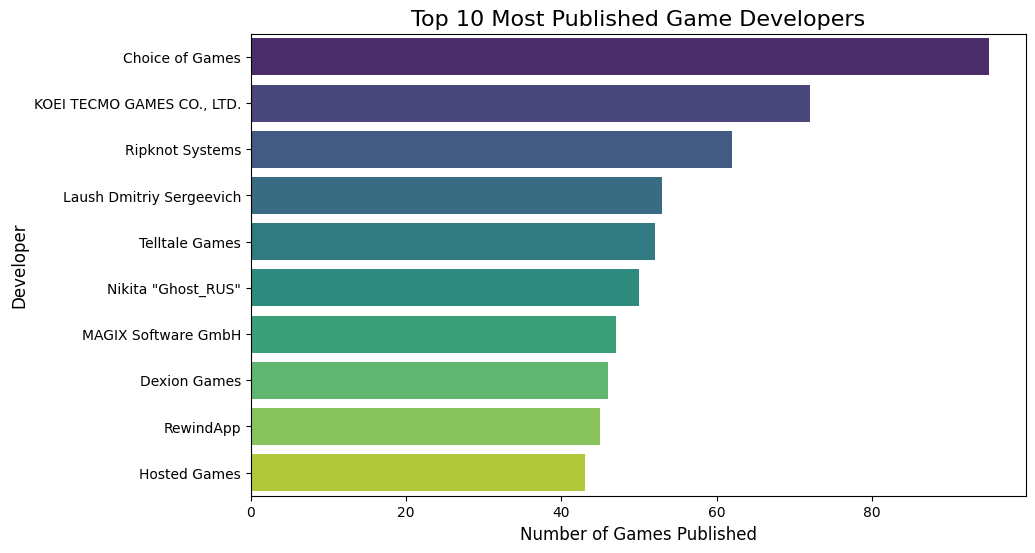

In [56]:



fdf = df[df['developer'] != 'Unknown']
top_developers = fdf['developer'].value_counts().head(10).reset_index()
top_developers.columns = ['Developer', 'Game Count']


plt.figure(figsize=(10, 6))
sns.barplot(data=top_developers, x='Game Count', y='Developer', hue='Developer', dodge=False, palette='viridis')

plt.title('Top 10 Most Published Game Developers', fontsize=16)
plt.xlabel('Number of Games Published', fontsize=12)
plt.ylabel('Developer', fontsize=12)
plt.show()

# 2. How many free and non-free games?

In [57]:
df['category'].value_counts()

category
Paid    25551
Free     3657
Name: count, dtype: int64

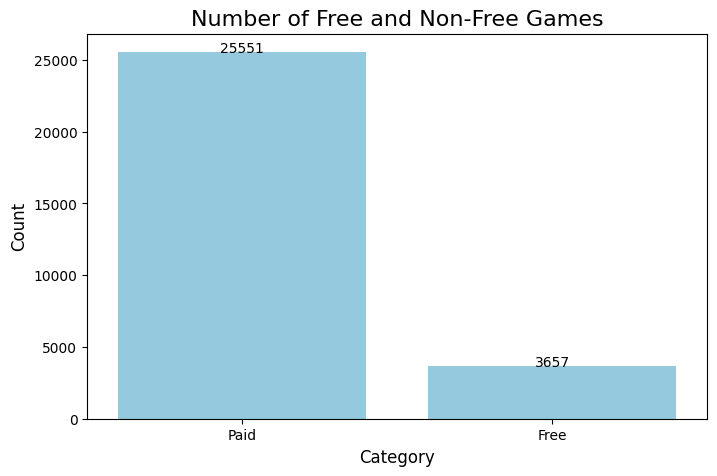

In [58]:

category_counts = df['category'].value_counts()
plt.figure(figsize=(8, 5))
sns.barplot(x=category_counts.index, y=category_counts.values, color='skyblue')
plt.title('Number of Free and Non-Free Games', fontsize=16)
plt.xlabel('Category', fontsize=12)
plt.ylabel('Count', fontsize=12)

for i, count in enumerate(category_counts.values):
    plt.text(i, count , str(count), ha='center', fontsize=10)

plt.show()

# 3. Which game has the most owners?

In [59]:


mog = df.loc[df['owners_avg'].idxmax()]
print(f"The game with the most owners is '{mog['name']}' with {mog['owners_avg']} owners.")


The game with the most owners is 'Dota 2' with 150000000 owners.


# 4. How many games of each type and what is the most popular type of games?


In [60]:
df['genre'].value_counts()


genre
Action, Indie                                                                      1971
Casual, Indie                                                                      1566
Action, Adventure, Indie                                                           1311
Adventure, Indie                                                                   1229
Action, Casual, Indie                                                              1061
                                                                                   ... 
Adventure, Casual, Free to Play, Indie, RPG, Simulation, Strategy, Early Access       1
Free to Play, Indie, RPG, Simulation, Strategy, Early Access                          1
Design & Illustration, Video Production                                               1
Action, Casual, Free to Play, Simulation, Early Access                                1
Casual, Simulation, Animation & Modeling, Design & Illustration, Utilities            1
Name: count, Length: 1625,

In [61]:
df['genre'].value_counts().idxmax()

'Action, Indie'

# 5. What are the top 10 supported languages?


In [62]:
language_counts = df['languages'].str.split(', ').explode().value_counts()

print("Most supported languages:")
print(language_counts.head(10))

Most supported languages:
languages
English                28908
German                  7568
French                  7065
Russian                 6666
Spanish - Spain         6527
Italian                 5095
Simplified Chinese      4966
Japanese                4158
Portuguese - Brazil     2949
Polish                  2696
Name: count, dtype: int64


C:\Users\user\AppData\Local\Temp\ipykernel_54160\85561074.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=language_counts.head(10).values, y=language_counts.head(10).index, palette='viridis')


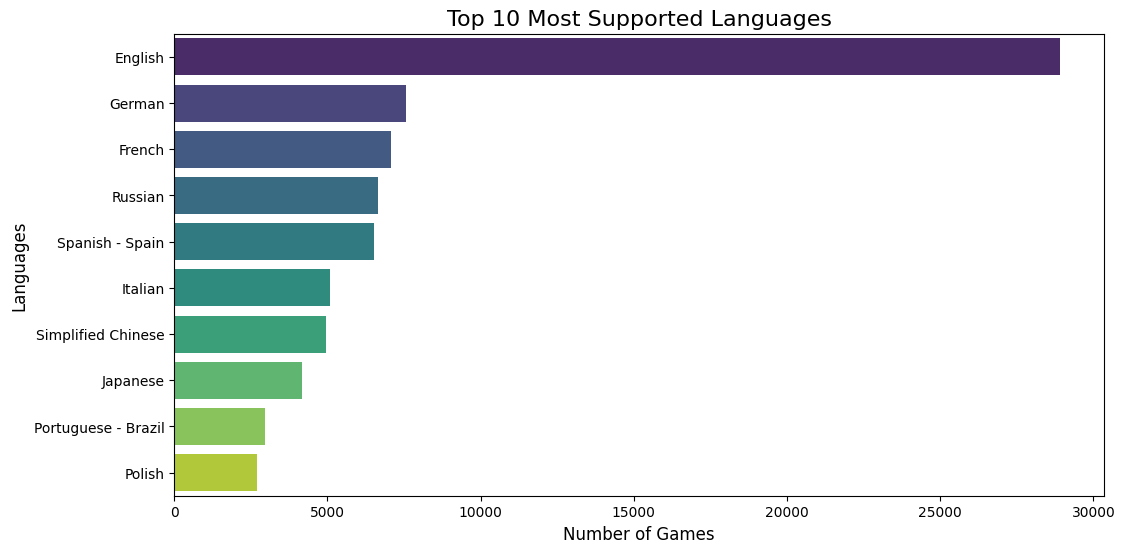

In [63]:
language_counts = df['languages'].str.split(', ').explode().value_counts() # to separate the list into indevidual rows
plt.figure(figsize=(12, 6))
sns.barplot(x=language_counts.head(10).values, y=language_counts.head(10).index, palette='viridis')
plt.title('Top 10 Most Supported Languages', fontsize=16)
plt.xlabel('Number of Games', fontsize=12)
plt.ylabel('Languages', fontsize=12)
plt.show()

# 6. What is the most played game?


In [64]:
mpg=df.loc[df['average_forever'].idxmax()]
print(f"The game with the most average playtime is '{mpg['name']}' with {mpg['average_forever']} minutes.")

The game with the most average playtime is 'The Abbey of Crime Extensum' with 190625.0 minutes.


# 7. What is the average price for paid games?

In [65]:
Q1 = df[df['price'] > 0]['price'].quantile(0.25)
Q3 = df[df['price'] > 0]['price'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
filtered_df = df[(df['price'] > 0) & (df['price'] >= lower_bound) & (df['price'] <= upper_bound)]
average_price = filtered_df['price'].mean()
print(f"The average price for paid games (excluding outliers) is ${average_price:.2f}.")

The average price for paid games (excluding outliers) is $7.10.


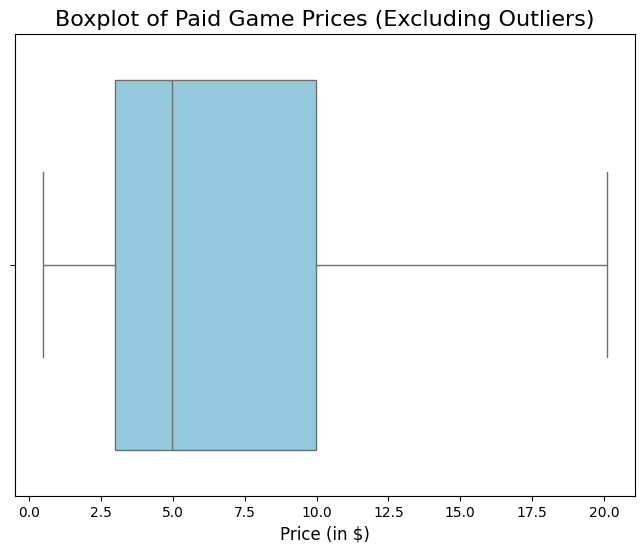

In [66]:
plt.figure(figsize=(8, 6))
sns.boxplot(data=filtered_df, x='price', color='skyblue')

plt.title('Boxplot of Paid Game Prices (Excluding Outliers)', fontsize=16)
plt.xlabel('Price (in $)', fontsize=12)
plt.show()

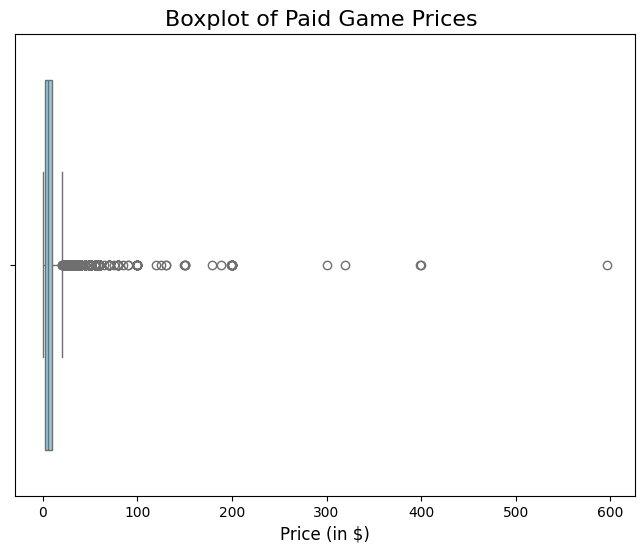

In [67]:
plt.figure(figsize=(8, 6))
sns.boxplot(data=df[df['price'] > 0], x='price', color='skyblue') 
plt.title('Boxplot of Paid Game Prices ', fontsize=16)
plt.xlabel('Price (in $)', fontsize=12)
plt.show()

# 8. Top 10 most popular games?

In [68]:
top_10_games=df.nlargest(10, 'owners_avg')[['name', 'owners_avg']]
print("Top 10 most popular games based on owners_avg:")
print(top_10_games)

Top 10 most popular games based on owners_avg:
                                   name  owners_avg
22                               Dota 2   150000000
25     Counter-Strike: Global Offensive    75000000
13880     PLAYERUNKNOWN'S BATTLEGROUNDS    75000000
19                      Team Fortress 2    35000000
1888                           Warframe    35000000
3772                           Unturned    35000000
0                        Counter-Strike    15000000
7        Counter-Strike: Condition Zero    15000000
9                           Half-Life 2    15000000
10               Counter-Strike: Source    15000000


C:\Users\user\AppData\Local\Temp\ipykernel_54160\3844889784.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_10_games, x='owners_avg', y='name', palette='viridis')


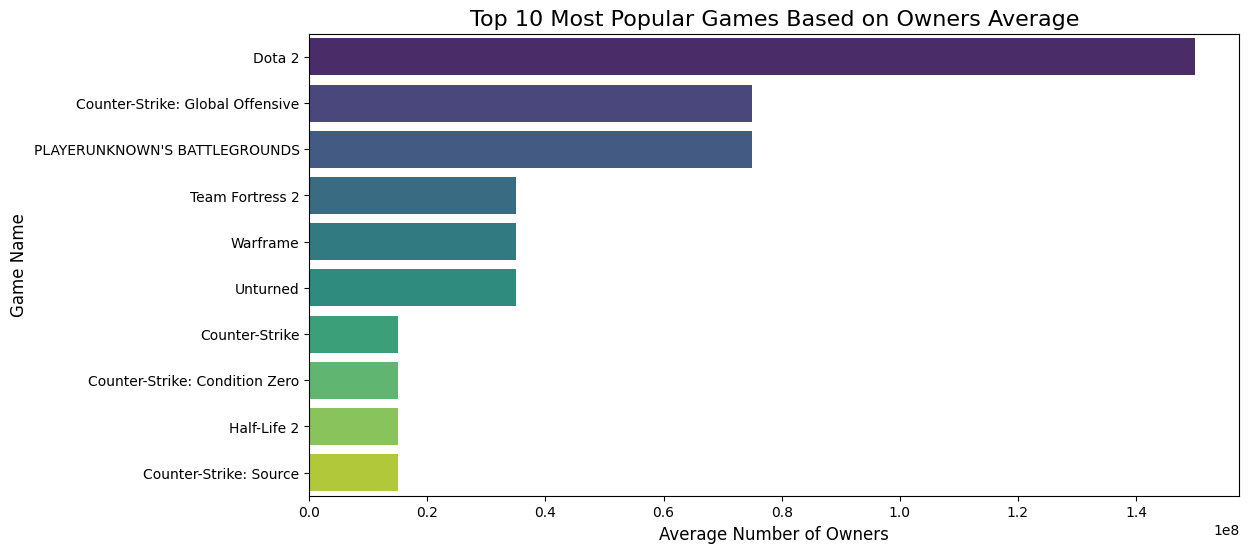

In [69]:
plt.figure(figsize=(12, 6))
sns.barplot(data=top_10_games, x='owners_avg', y='name', palette='viridis')
plt.title('Top 10 Most Popular Games Based on Owners Average', fontsize=16)
plt.xlabel('Average Number of Owners', fontsize=12)
plt.ylabel('Game Name', fontsize=12)
plt.show()

# 9. Which publisher has the best average rating?

In [ ]:
filtered_df = df[df['owners_avg'] > 100000]
pub_avg = filtered_df.groupby('publisher')['userscore'].mean()
best_publisher = pub_avg.idxmax()
best_avg_rating = pub_avg.max()

print(f"The publisher with the best average rating is '{best_publisher}' with an average rating of {best_avg_rating:.2f}.")

The publisher with the best average rating is 'Wube Software LTD.' with an average rating of 98.50.


# 10. What is the relationship between discount and the number of owners?

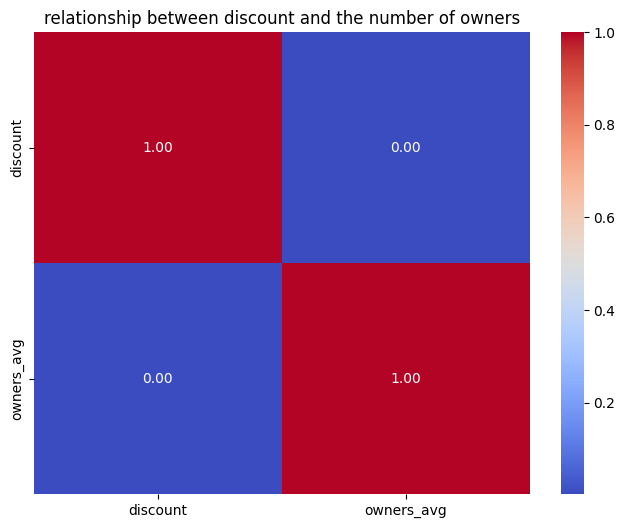

In [72]:

l = df[['discount', 'owners_avg']]
plt.figure(figsize=(8, 6))
correlation = l.corr()
sns.heatmap(correlation, annot= True, cmap= 'coolwarm', fmt= '.2f')
plt.title('relationship between discount and the number of owners')
plt.show()

# 11. How many games have 'Multiplayer' and free?

In [73]:
multiplayer_free_games = df[(df['category'] == 'Free') & (df['genre'].str.contains('Multiplayer', na=False))]

count_multiplayer_free = multiplayer_free_games.shape[0]

print(f"The number of games that are 'Multiplayer' and free is {count_multiplayer_free}.")

The number of games that are 'Multiplayer' and free is 466.


# 12. Do larger companies get higher ratings?

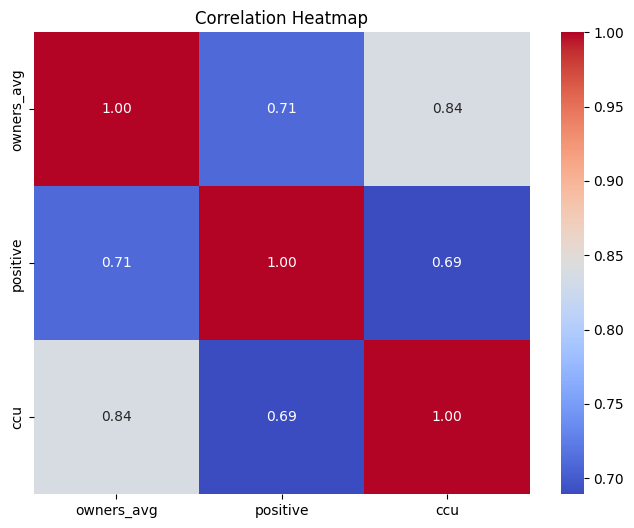

In [74]:

l = df[['owners_avg', 'positive','ccu']]
plt.figure(figsize=(8, 6))
correlation = l.corr()
sns.heatmap(correlation, annot= True, cmap= 'coolwarm', fmt= '.2f')
plt.title('Correlation Heatmap')
plt.show()

# 13. How many games received more negative reviews than positive ones?

In [75]:
negative_reviews = df[df['negative'] > df['positive']]

neg_reviews_number = negative_reviews.shape[0]

print(f"The number of games that received more negative reviews than positive ones is {neg_reviews_number}.")

The number of games that received more negative reviews than positive ones is 4566.


# 14 . is there a relation between user average & price ?

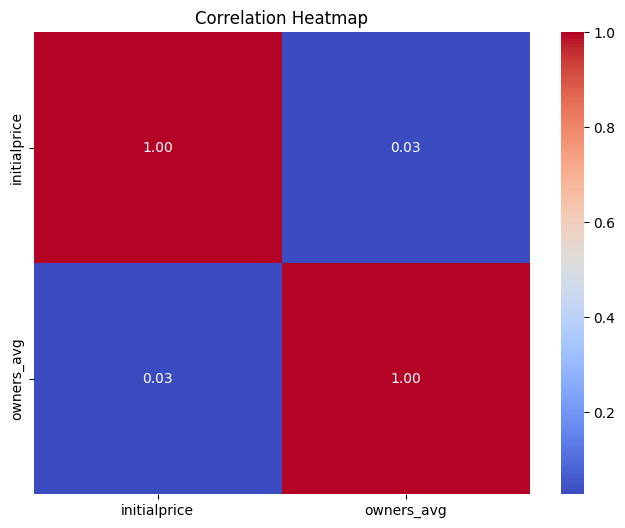

In [76]:
x = df[['initialprice', 'owners_avg']]
plt.figure(figsize=(8, 6))
correlation = x.corr()
sns.heatmap(correlation, annot= True, cmap= 'coolwarm', fmt= '.2f')
plt.title('Correlation Heatmap')
plt.show()

# 15. How many games have a positive rating of more than 90%?

In [77]:
games = df[df['userscore'] > 90]  
games_number = games.shape[0]

print(f"The number of games with a positive rating of more than 90% is {games_number}.")

The number of games with a positive rating of more than 90% is 6647.


# 16. correlation matrix


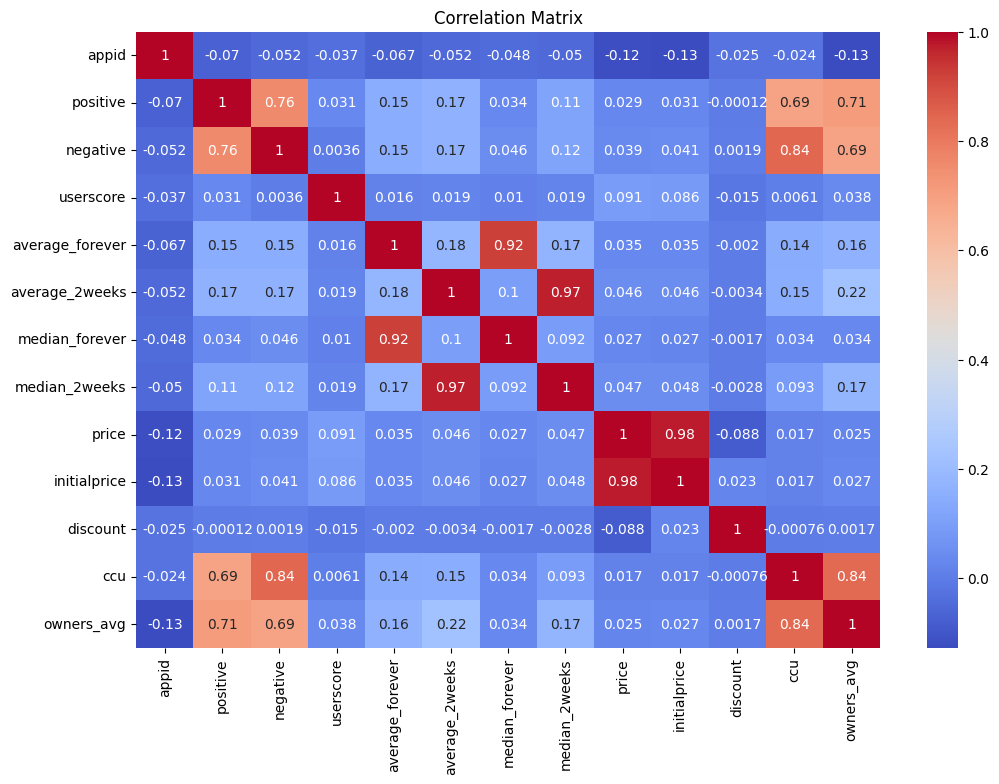

In [78]:
numeric_df = df.select_dtypes(include=['float64', 'int64'])
correlation_matrix = numeric_df.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()